Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("second_cleaned_dataset.csv")
df = pd.read_pickle("second_cleaned_dataset.pkl")

C:\Users\malip\AppData\Local\Temp\ipykernel_10208\110334805.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("second_cleaned_dataset.csv")


In [13]:
df.head(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,Category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0


# Task 5 : Finding hidden patterns that are counter-intuitive for a layman

In [22]:
df['Status_norm'] = df['status'].astype(str).str.lower().str.strip()


completed = df[df['Status_norm'] == 'complete']

if completed.empty:
    print("No completed orders found.")
else:
 
    customer_item_count = completed.groupby('Customer ID')['item_id'].count()
    top_customer_id = customer_item_count.idxmax()
    top_item_count = int(customer_item_count.max())

    print(f"Top customer ID: {top_customer_id} with {top_item_count} completed items")


Top customer ID: 163.0 with 1657 completed items


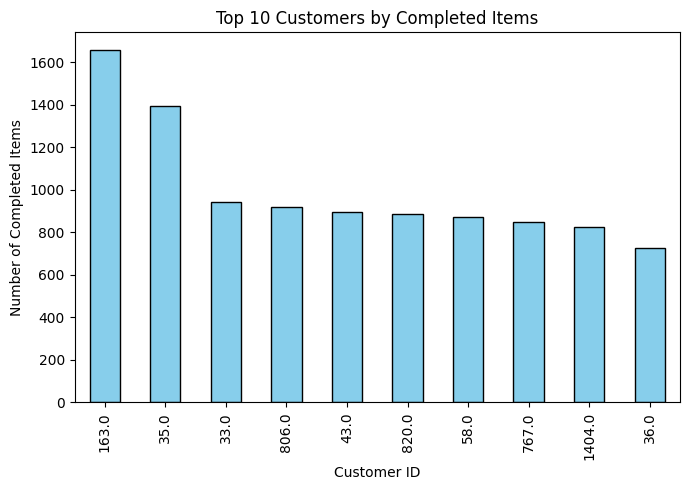

In [25]:
top10 = customer_item_count.sort_values(ascending=False).head(10)


plt.figure(figsize=(7,5))
top10.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Top 10 Customers by Completed Items')
plt.xlabel('Customer ID')
plt.ylabel('Number of Completed Items')
plt.tight_layout()
plt.show()

# Task 6 : Predict future orders

In [26]:
df.tail(2)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,Category,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584480,905160.0,cod,8/28/2018,MATHUA5AE4D132A2D5A,21599.0,1.0,21899.0,100562351,Mobiles & Tablets,C-PEW-112010,...,cod,8/28/2018,Valid,"21,599",2018.0,8.0,2018-5,8-2018,FY19,106822.0
584491,905171.0,processing,8/28/2018,MATAPP59AD3CFE4A7CA,44459.0,1.0,44759.0,100562360,Mobiles & Tablets,111066,...,cod,8/28/2018,Gross,"44,459",2018.0,8.0,2017-11,8-2018,FY19,67562.0


In [27]:


df['Status_norm_2'] = df['status'].astype(str).str.lower().str.strip()
completed = df[df['Status_norm_2'].str.contains('complete', na=False)]

# Step 2: Convert 'Created Date' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Step 3: Group by date to get daily order counts
orders_per_day = completed.groupby(df['created_at'].dt.date).size().reset_index(name='orders')

# Make 'Created Date' a proper datetime index
orders_per_day['created_at'] = pd.to_datetime(orders_per_day['created_at'])
orders_per_day = orders_per_day.set_index('created_at')

print(orders_per_day.head())



            orders
created_at        
2016-07-01     352
2016-07-02     144
2016-07-03      93
2016-07-04     145
2016-07-05      97


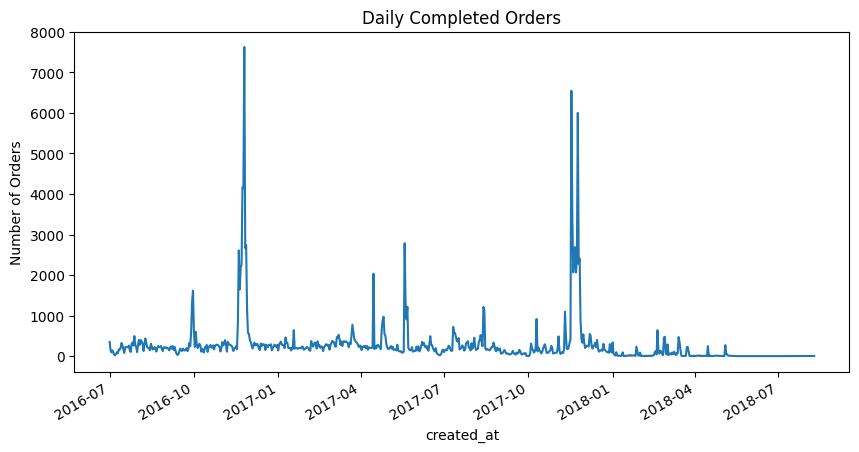

In [ ]:
orders_per_day['orders'].plot(figsize=(10,5))
plt.title("Daily Completed Orders")
plt.ylabel("Number of Orders")
plt.show()


07:11:04 - cmdstanpy - INFO - Chain [1] start processing
07:11:04 - cmdstanpy - INFO - Chain [1] done processing


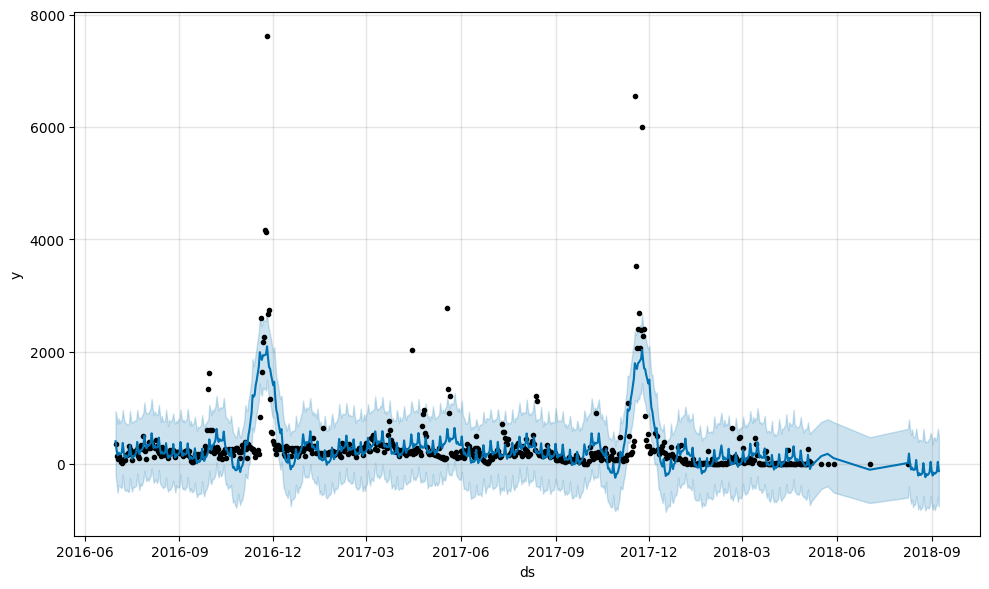

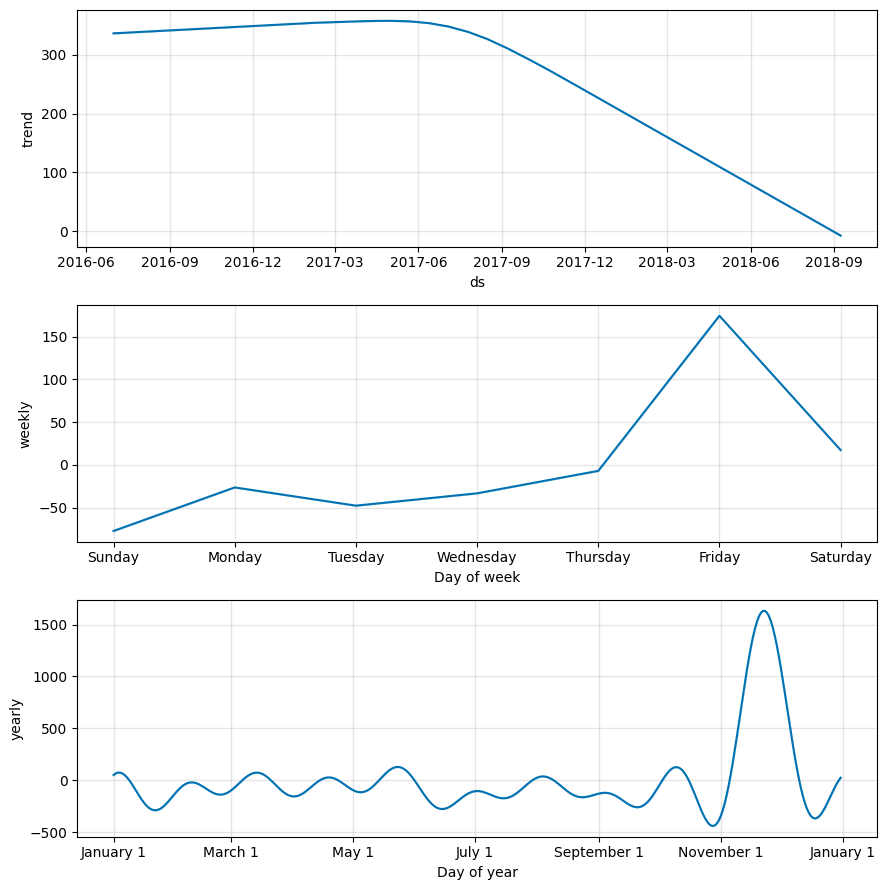

In [31]:
from prophet import Prophet


df_prophet = orders_per_day.reset_index().rename(columns={'created_at': 'ds', 'orders': 'y'})


model = Prophet()
model.fit(df_prophet)


future = model.make_future_dataframe(periods=30)  
forecast = model.predict(future)


model.plot(forecast)
plt.show()


model.plot_components(forecast)
plt.show()
